In [10]:
import sys
print(sys.executable)

E:\anaconda3\envs\tensorflow21gpu\python.exe


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
# import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
GPU 사용 가능 여부: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
train_pandas = pd.read_csv("train_job/train.csv")

In [13]:
train_and_test = pd.read_csv('prac3_train_and_test2.csv', index_col=0)

In [14]:
train_and_test = train_and_test.loc[:, (train_and_test != 0).any(axis=0)]

In [15]:
train_set, test_set = train_and_test.drop(['userID', 'jobID'], axis=1)[:6000], train_and_test.drop(['userID', 'jobID'], axis=1)[6000:]

In [16]:
train_set = (train_set - train_set.mean())/train_set.std()
test_set = (test_set - train_set.mean())/train_set.std()

In [17]:
predict_label = tf.cast(tf.one_hot(train_pandas['applied'],2), tf.int64)

In [18]:
seed = 7
np.random.seed(seed)

# Model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(2500, input_dim=420))
model.add(tf.keras.layers.Dense(1250))
model.add(tf.keras.layers.Dense(625))
model.add(tf.keras.layers.Dense(312))
model.add(tf.keras.layers.Dense(56))
model.add(tf.keras.layers.Dense(28))
model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(2, kernel_initializer='normal',activation=tf.nn.softmax))
model.add(tf.keras.layers.Dense(2))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_fit = model.fit(np.array(train_set), np.array(predict_label), epochs=10, batch_size=5, verbose=2,validation_split=0.1)

Train on 5400 samples, validate on 600 samples
Epoch 1/10
5400/5400 - 6s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 2/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 3/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 4/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 5/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 6/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 7/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 8/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_loss: 1.1921e-07 - val_accuracy: 0.8433
Epoch 9/10
5400/5400 - 5s - loss: 1.1921e-07 - accuracy: 0.8587 - val_los

In [19]:
model.evaluate(np.array(train_set), np.array(predict_label))

6000/6000 [==============================] - 1s 95us/sample - loss: 1.1921e-07 - accuracy: 0.8572


[1.1920930376163597e-07, 0.85716665]

In [20]:
y_predict = model(np.array(test_set))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [21]:
print(y_predict)

tf.Tensor(
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]], shape=(2435, 2), dtype=float32)


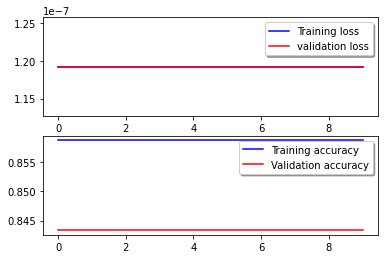

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_fit.history['loss'], color='b', label="Training loss")
ax[0].plot(history_fit.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_fit.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_fit.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [23]:
val_label_num = np.argmax(y_predict, axis=1).reshape(-1,1)

In [24]:
result = pd.DataFrame(val_label_num,columns=['applied'])

In [25]:
import datetime
now = datetime.datetime.now()
result.to_csv('output_{}.csv'.format(now.strftime('%y_%m_%d_%H_%M_%S')), index=False)